

# 🧠 Multi-Layer Perceptron (MLP) - Deep Learning Notes

## 📌 What is an MLP?

- A **Multi-Layer Perceptron (MLP)** is a type of **feedforward artificial neural network**.
- It’s the simplest form of deep neural network, featuring **one or more hidden layers** between the input and output layers.
- MLP is **fully connected**: every neuron in one layer connects to every neuron in the next layer.

---

## 📚 Intuition

Imagine teaching a machine to recognize handwritten digits (0–9):

- A **single-layer perceptron** struggles with non-linear patterns (e.g., curves in digits).
- Adding **hidden layers** with **nonlinear activation functions** enables MLPs to learn complex, non-linear patterns.
- By stacking simple functions (neurons), MLPs can model virtually any function, as supported by the **Universal Approximation Theorem**.

---

## 🧱 Structure of an MLP

```
Input Layer → Hidden Layer(s) → Output Layer
```

Each layer consists of:

- **Neurons (nodes)** that perform:
  - **Linear transformation**: `z = W·x + b`
  - **Activation function**: `a = activation(z)`

---

## 🔣 Notation

| Symbol | Meaning                          |
|--------|----------------------------------|
| `x`    | Input vector                    |
| `W`    | Weight matrix                   |
| `b`    | Bias vector                     |
| `z`    | Linear combination (`W·x + b`)  |
| `a`    | Activation output               |
| `L`    | Total number of layers          |
| `n[l]` | Number of neurons in layer `l`  |
| `a[0]` | Input features                  |

---



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


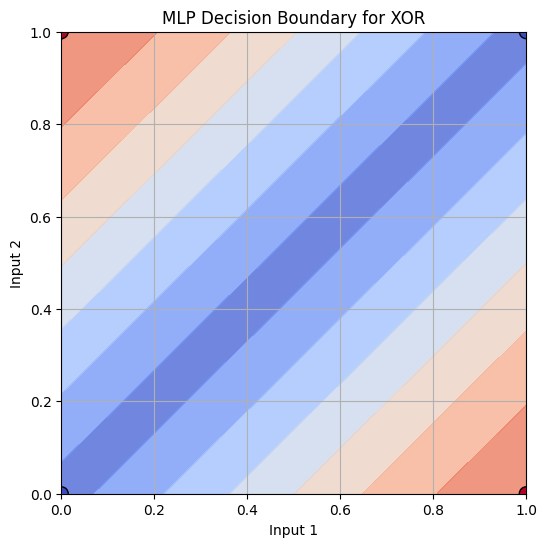

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Build the MLP model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # hidden layer with ReLU
model.add(Dense(1, activation='sigmoid'))            # output layer

# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=1000, verbose=0)

# Create a grid of points for visualization
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid).reshape(xx.shape)

# Plotting
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, preds, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k', cmap='coolwarm', s=100)
plt.title("MLP Decision Boundary for XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Test Accuracy: 1.0000


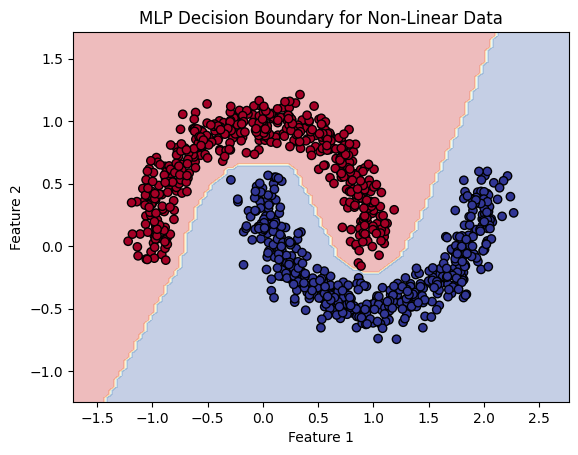

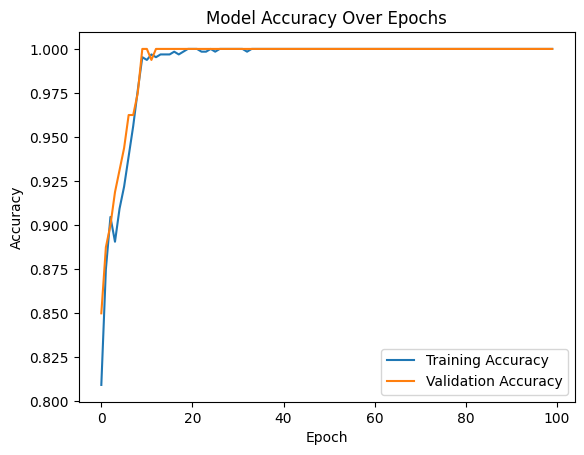

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate a non-linear dataset (moon-shaped)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build the MLP model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),  # Hidden layer 1
    Dense(16, activation='relu'),                    # Hidden layer 2
    Dense(1, activation='sigmoid')                   # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 3. Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    # Plot decision boundary and points
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title('MLP Decision Boundary for Non-Linear Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 4. Plot training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the visualization functions
plot_decision_boundary(X, y, model)
plot_training_history(history)


# 🧠 Forward Propagation in Neural Networks

---

## 🔹 What is Forward Propagation?

**Forward Propagation** is the process of **passing input data through the layers of a neural network**, computing the output (prediction) at each layer, until you get the final result.

Think of it as a **flow of information** from:

```
Input ➜ Hidden Layers ➜ Output
```

At each layer:

* The input is multiplied by **weights**
* A **bias** is added
* An **activation function** is applied

---

## 🧱 Simple Neural Network Architecture

Let’s assume a simple feedforward network:

* **Input Layer:** 4 neurons
* **Hidden Layer 1:** 3 neurons
* **Hidden Layer 2:** 2 neurons
* **Output Layer:** 1 neuron

### 🎯 Goal: Predict whether a student gets placed (Yes = 1, No = 0)

---

## 🔢 Matrix Notation & Formulas

### 🔹 Notation:

| Symbol    | Meaning                                   |
| --------- | ----------------------------------------- |
| $a^{(l)}$ | Activation (output) from layer $l$        |
| $z^{(l)}$ | Linear combination (before activation)    |
| $W^{(l)}$ | Weights for layer $l$                     |
| $b^{(l)}$ | Biases for layer $l$                      |
| $\sigma$  | Activation function (e.g., Sigmoid, ReLU) |

---

## 🔁 Forward Propagation Formulas

At **layer $l$**:

$$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} \quad \text{(Linear Transformation)}
$$

$$
a^{(l)} = \sigma(z^{(l)}) \quad \text{(Activation Function)}
$$

---

## 🧮 Matrix Calculation Walkthrough (With Dimensions)

### Step-by-step through the network:

### 🟦 **Layer 0 (Input)**

Input vector:

$$
a^{(0)} = x =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
\quad \text{(Size: } 4 \times 1 \text{)}
$$

---

### 🟩 **Layer 1 (Hidden Layer with 3 neurons)**

* Weight matrix $W^{(1)}$: $3 \times 4$
* Bias vector $b^{(1)}$: $3 \times 1$

**Linear combination:**

$$
z^{(1)} =
\underbrace{
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & w_{14} \\
w_{21} & w_{22} & w_{23} & w_{24} \\
w_{31} & w_{32} & w_{33} & w_{34}
\end{bmatrix}
}_{W^{(1)}\ (3 \times 4)}
\cdot
\underbrace{
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
}_{a^{(0)}\ (4 \times 1)}
+
\underbrace{
\begin{bmatrix}
b_1 \\
b_2 \\
b_3
\end{bmatrix}
}_{b^{(1)}\ (3 \times 1)}
$$

Resulting in:

$$
z^{(1)} =
\begin{bmatrix}
z_1^{(1)} \\
z_2^{(1)} \\
z_3^{(1)}
\end{bmatrix}
\quad (3 \times 1)
$$

Apply activation (e.g., ReLU):

$$
a^{(1)} =
\begin{bmatrix}
\sigma(z_1^{(1)}) \\
\sigma(z_2^{(1)}) \\
\sigma(z_3^{(1)})
\end{bmatrix}
$$

---

### 🟨 **Layer 2 (Hidden Layer with 2 neurons)**

* $W^{(2)}$: $2 \times 3$
* $b^{(2)}$: $2 \times 1$

$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)} \Rightarrow \text{Size: } 2 \times 1
$$

$$
a^{(2)} = \sigma(z^{(2)})
$$

---

### 🟥 **Layer 3 (Output Layer, 1 neuron)**

* $W^{(3)}$: $1 \times 2$
* $b^{(3)}$: $1 \times 1$

$$
z^{(3)} = W^{(3)} a^{(2)} + b^{(3)} \Rightarrow \text{Scalar}
$$

Apply **Sigmoid** (for binary classification):

$$
a^{(3)} = \sigma(z^{(3)}) = \frac{1}{1 + e^{-z^{(3)}}}
$$

---

## 🧠 Linear Algebra & Dot Product Intuition

Each neuron computes a **dot product** between:

* Its weights and
* The inputs from the previous layer

Then adds a bias:

$$
z = \mathbf{w} \cdot \mathbf{x} + b
$$

This dot product captures **how strongly each input influences the neuron**.

Matrix multiplication lets us compute all neurons in a layer at once — making it fast and efficient using NumPy/TensorFlow/PyTorch.

---

## ⚡ Activation Function Intuition

### 1. **Sigmoid**:

Used in binary classification

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Squeezes values to (0, 1)

---

### 2. **ReLU (Rectified Linear Unit)**:

Used in hidden layers

$$
\sigma(z) = \max(0, z)
$$

Keeps only positive values — introduces non-linearity without saturation

---

## 🧾 Notation Summary

| Layer      | Activation                                    | Weights      | Biases       | Formula |
| ---------- | --------------------------------------------- | ------------ | ------------ | ------- |
| 0 (Input)  | $$a^{(0)} = x$$                                 | –            | –            | –       |
| 1 (Hidden) | $$a^{(1)} = \sigma(W^{(1)} a^{(0)} + b^{(1)})  $$   | $3 \times 4$ | $3 \times 1$ | ✅       |
| 2 (Hidden) | $$a^{(2)} = \sigma(W^{(2)} a^{(1)} + b^{(2)})  $$   | $2 \times 3$ | $2 \times 1$ | ✅       |
| 3 (Output) | $$a^{(3)} = \sigma(W^{(3)} a^{(2)} + b^{(3)})  $$   | $1 \times 2$ | $1 \times 1$ | ✅       |

---

### 📌 Summary in One Formula Chain:

$$
a^{(3)} = \sigma\left(W^{(3)} \cdot \sigma\left(W^{(2)} \cdot \sigma\left(W^{(1)} \cdot x + b^{(1)}\right) + b^{(2)}\right) + b^{(3)}\right)
$$

